In [8]:
import numpy as np
import pandas as pd 

#### 波士顿房价数据
* CRIM 房屋所在镇的犯罪率
* ZN 面积大于25000平方英尺住宅所占的比例
* INDUS 房屋所在镇非零售区域所占比例
* CHAS 位于河边 1 or 0
* NOX 一氧化氮浓度
* RM 平均房间数量
* AGE 1940年前建成房屋所占比例
* DIS 房屋距离波士顿五大就业中心的加权距离
* RAD 距离房屋最近的公路
* TAX 税收额度
* PTRATIO 房屋所在镇师生比例
* B 计算公式：1000 * （房屋所在镇非美籍人口所在比例-0.63）** 2
* LSTAT 弱势群体人口所占比例
* MEDV 房屋的平均价格

In [9]:
data = pd.read_csv(r"./files/boston.csv")
# data.info() # 可以查看基本信息，是否存在缺失值
# data.duplicated().any() # 查看是否重复值

In [10]:
class LinearRegression:
    
    def fit(self,X,y):
        '''
        训练模型
        
        Parameters
        X : 类数组类型 [样本数量,特征数量]
        y : 类数组类型 [样本数量]
        '''
        # 如果X是数组对象的一部分而不是完整的对象数据，因此使用X.copy()
        X = np.asmatrix(X.copy())
        # reshape() 转换成列向量
        y = np.asmatrix(y).reshape(-1,1) 
        
        # 最佳权重值
        self.w = (X.T * X).I * X.T * y

        
    def predict(self,X):
        '''
        预测
        
        returns : 数组类型
        '''
        
        X = np.asmatrix(X.copy())
        result = X * self.w
        return np.array(result).ravel()
        
        

In [15]:
t = data.sample(len(data),random_state=0)

train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

lr = LinearRegression()
lr.fit(train_X,train_y)
result = lr.predict(test_X)

display(np.mean((result-test_y)**2))
display(lr.w)

17.0119055336331

matrix([[-9.32859692e-02],
        [ 4.39664692e-02],
        [ 5.72354432e-03],
        [ 2.41509608e+00],
        [-3.31988921e+00],
        [ 5.59119871e+00],
        [-2.18905524e-03],
        [-8.57221736e-01],
        [ 2.28120616e-01],
        [-1.18896061e-02],
        [-2.52710238e-01],
        [ 1.49077626e-02],
        [-4.56116634e-01]])

In [17]:
t = data.sample(len(data) ,random_state=0)
# 添加截距
new_clumns=t.columns.insert(0,"Intercept")
t = t.reindex(columns=new_clumns,fill_value=1)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

lr = LinearRegression()
lr.fit(train_X,train_y)
result = lr.predict(test_X)

display(np.mean((result-test_y)**2))
display(lr.w)

17.097531384668542

matrix([[ 4.00542166e+01],
        [-1.10490198e-01],
        [ 4.11074548e-02],
        [ 1.14986147e-02],
        [ 2.03209693e+00],
        [-1.95402764e+01],
        [ 3.28900304e+00],
        [ 6.91671720e-03],
        [-1.39738261e+00],
        [ 3.78327573e-01],
        [-1.54938397e-02],
        [-8.64470498e-01],
        [ 8.29999966e-03],
        [-5.66991979e-01]])

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 默认英文
# 设置黑体
mpl.rcParams['font.family'] = "Heiti TC"
# 设置负号(-)
mpl.rcParams['axes.unicode_minus'] = False

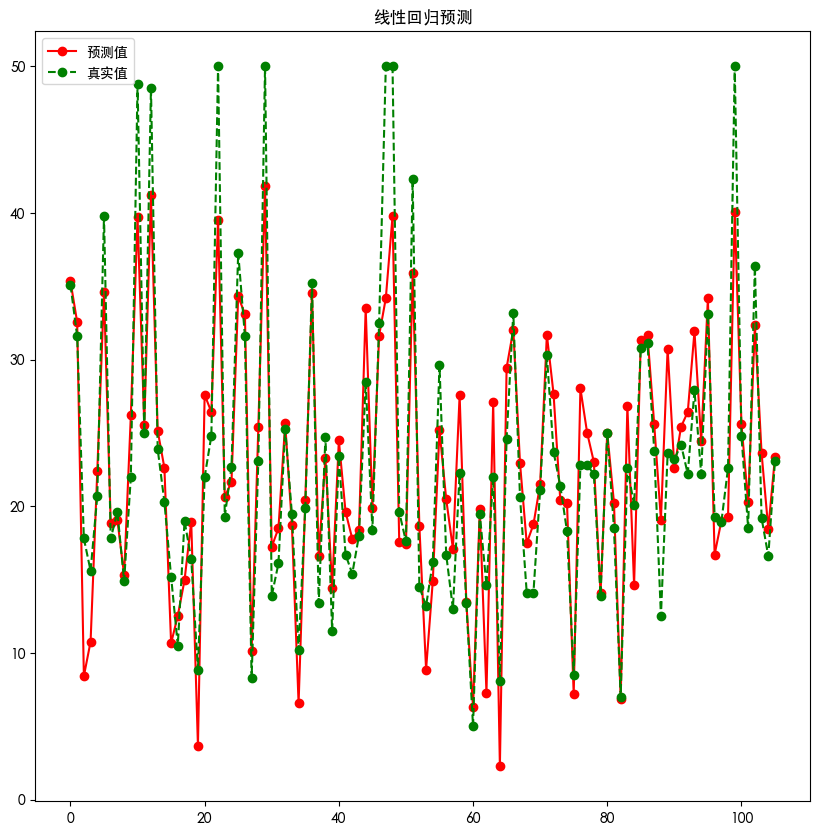

In [24]:
plt.figure(figsize=(10,10))

plt.plot(result,"ro-",label="预测值")

plt.plot(test_y.values,"go--",label="真实值")

plt.title("线性回归预测")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()